# **Veri yükleme**

In [123]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab çalışma/Neıman/acd/diabetes.csv')

In [124]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [126]:
#eksik veri kontrolü
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **Veri Görselleştirme**

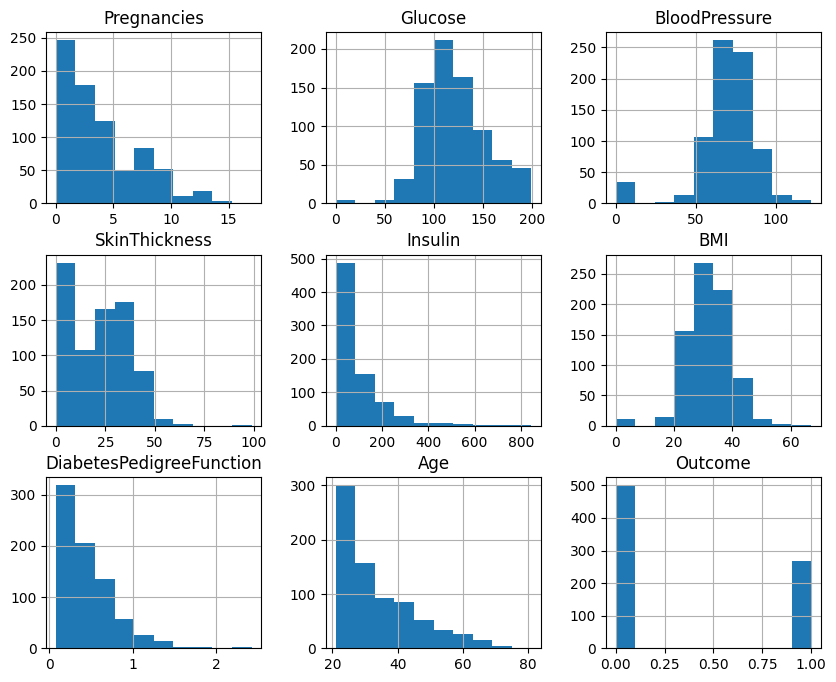

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df.hist(figsize=(10, 8))
plt.show()

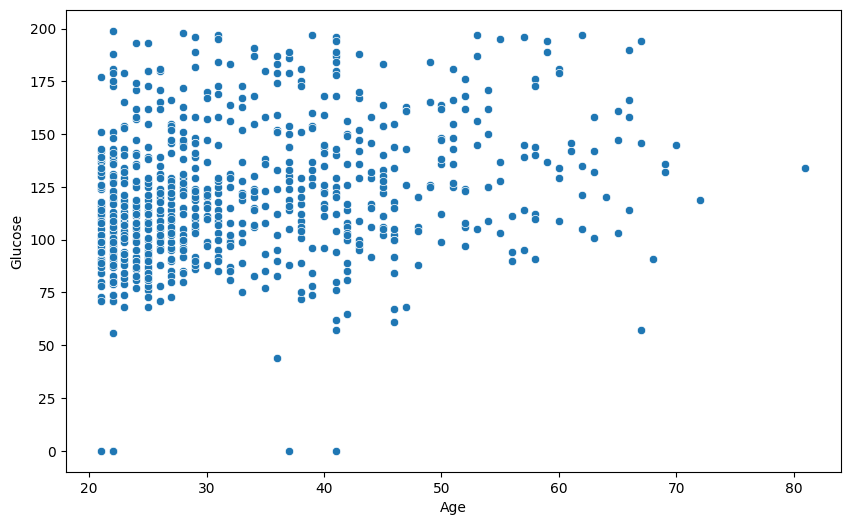

In [128]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Glucose', data=df)
plt.show()

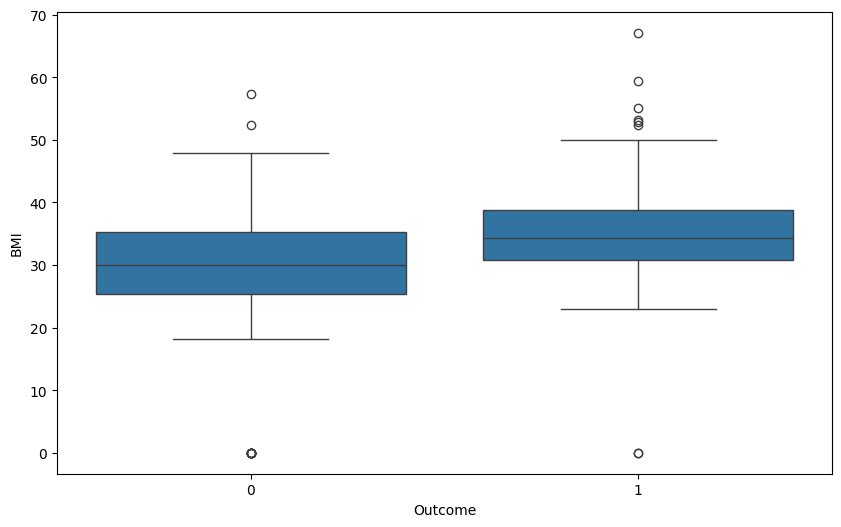

In [129]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.show()

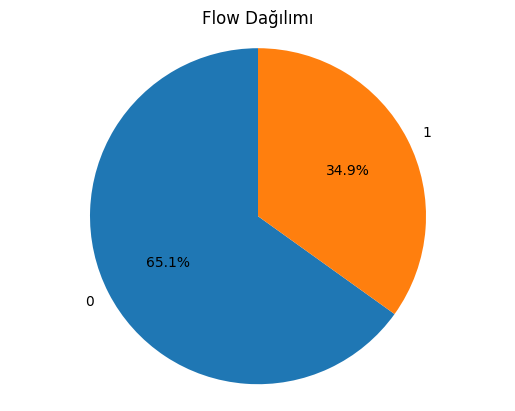

In [130]:
flow_counts = df["Outcome"].value_counts()
plt.pie(flow_counts, labels=flow_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Flow Dağılımı")
plt.show()

In [131]:
# Her sütunun Outcome değerine göre ortalamalarını hesaplama
mean_values = df.groupby('Outcome').mean().transpose()

# Sonuçları yazdırma
print(mean_values)

Outcome                            0           1
Pregnancies                 3.298000    4.865672
Glucose                   109.980000  141.257463
BloodPressure              68.184000   70.824627
SkinThickness              19.664000   22.164179
Insulin                    68.792000  100.335821
BMI                        30.304200   35.142537
DiabetesPedigreeFunction    0.429734    0.550500
Age                        31.190000   37.067164


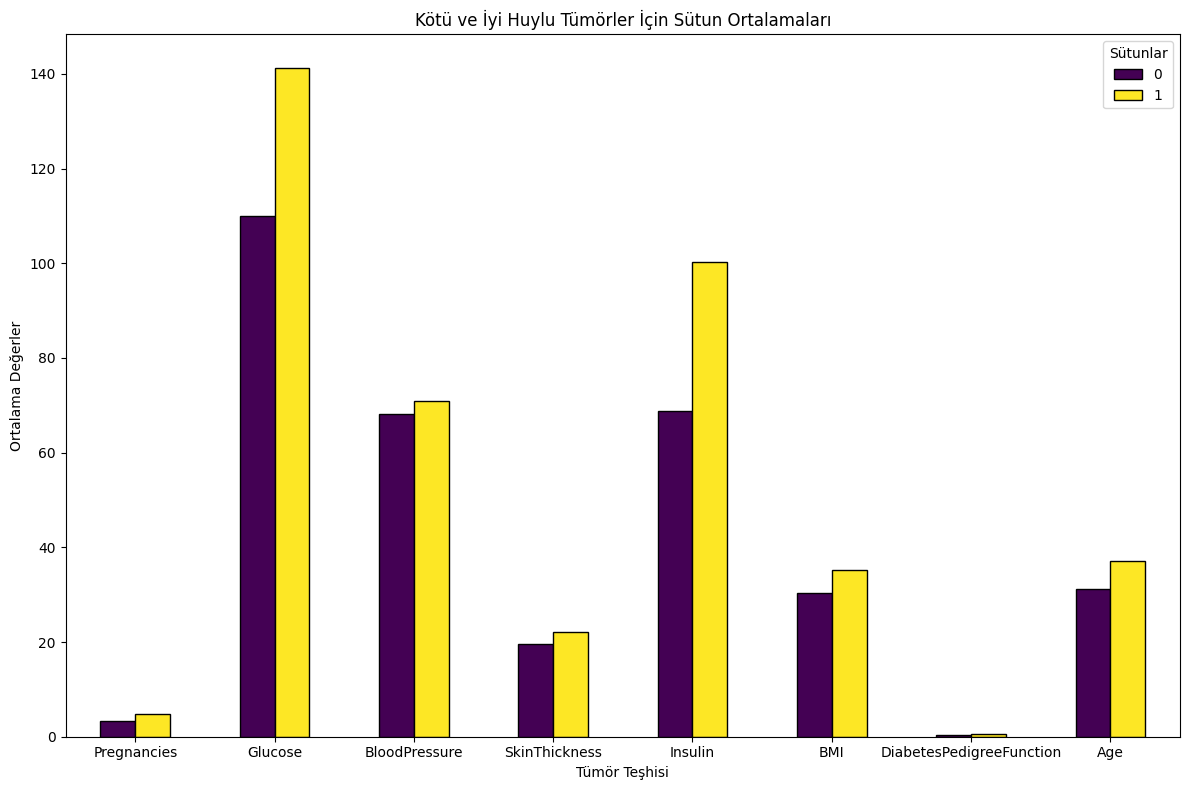

In [132]:
# Ortalama değerlere göre çubuk grafik çizimi
mean_values.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')

# Grafik başlık ve etiketlerini ayarlama
plt.title('Kötü ve İyi Huylu Tümörler İçin Sütun Ortalamaları')
plt.xlabel('Tümör Teşhisi')
plt.ylabel('Ortalama Değerler')
plt.xticks(rotation=0)  # X eksenindeki etiketlerin yatay görünmesini sağlar
plt.legend(title='Sütunlar', bbox_to_anchor=(1, 1))  # Legend konumunu ayarlar
plt.tight_layout()  # Grafik düzenini otomatik olarak ayarlar
plt.show()  # Grafiği gösterir

# **Korelasyon analizi**

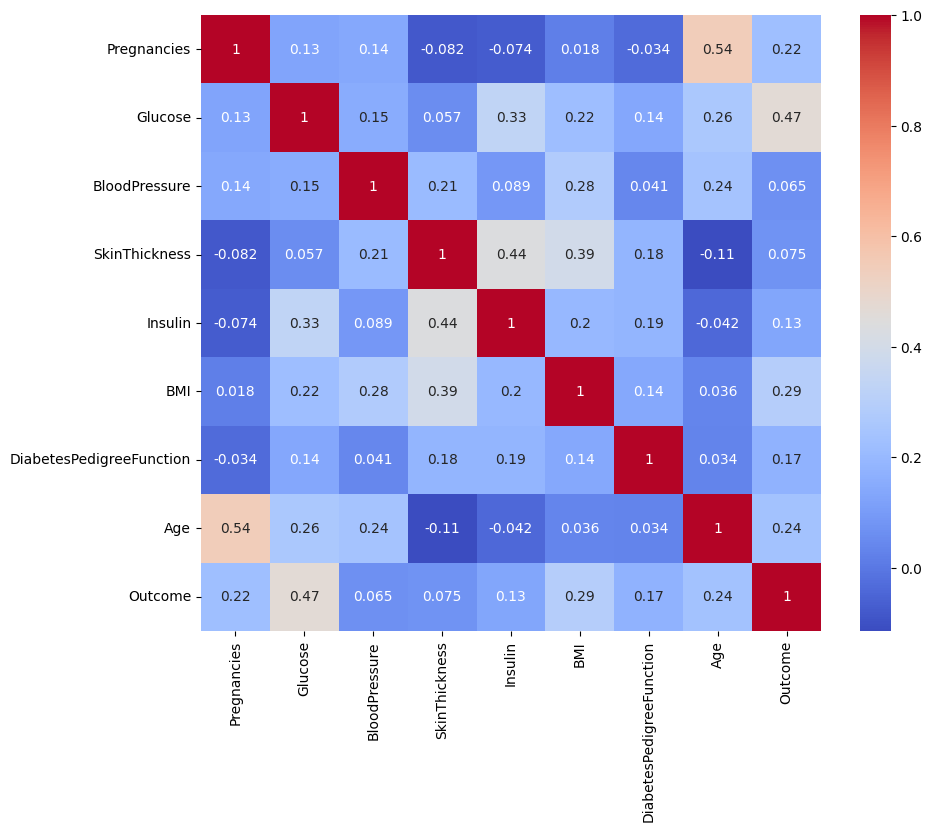

In [133]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

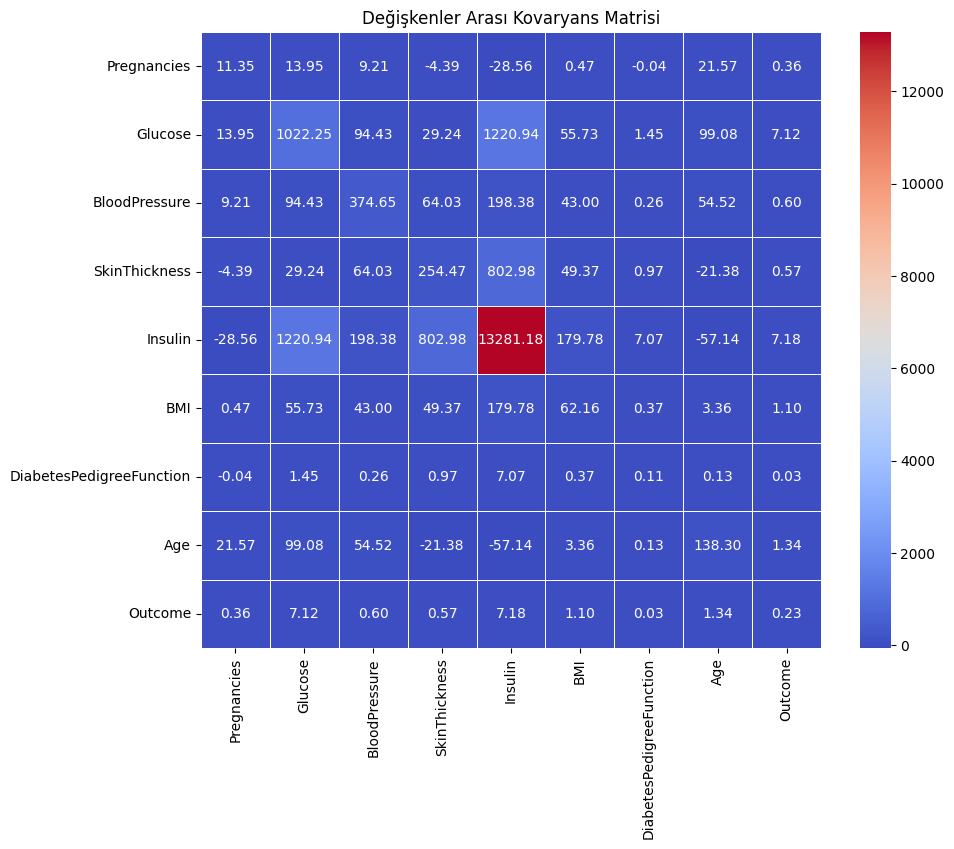

In [134]:
# Kovaryans matrisini hesaplama
cov_matrix = df.cov()

# Isı haritası (heatmap) çizme
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Değişkenler Arası Kovaryans Matrisi')
plt.show()

# **Bağımlı değişkenler ve bağımsız değişkenler**

In [135]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [136]:
from sklearn.model_selection import train_test_split

#  Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train setini tekrar train ve validation setlerine bölelim
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# **Veriyi Ölçeklendirme**

In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# **Modelleri tanımlama**

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb



# Modelleri tanımlama ve ekleme
models = [
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)),
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Support Vector Machine", SVC(kernel="linear", C=1.0)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("XGBoost", xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]

In [139]:
# Model performanslarını Validation
results = {"Model": [], "F1 Score": [], "Precision": [], "Recall": [], "Accuracy": []}
#  Model performanslarını test
test_results = {"Model": [], "F1 Score": [], "Precision": [], "Recall": [], "Accuracy": [], "Confusion Matrix": []}

# **Validation data set değerlendirmesi**

In [140]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

for model_name, model in models:
    model.fit(X_train_scaled, y_train)
    #val
    y_pred = model.predict(X_val_scaled)
    # test
    y_pred_test = model.predict(X_test_scaled)
    #val
    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)


    results["Model"].append(model_name)
    results["F1 Score"].append(f1)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["Accuracy"].append(accuracy)

    #test
    f1_test = f1_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    test_results["Model"].append(model_name)
    test_results["F1 Score"].append(f1_test)
    test_results["Precision"].append(precision_test)
    test_results["Recall"].append(recall_test)
    test_results["Accuracy"].append(accuracy_test)
    test_results["Confusion Matrix"].append(cm)

In [141]:
# Sonuçları DataFrame'e çevirme
results_df = pd.DataFrame(results)
# Her bir modelin test setindeki performanslarını yazdırma
for index, row in results_df.iterrows():
    print(f"{row['Model']} Modeli validation Seti Performansı:")
    print(f"F1 Score: {row['F1 Score']:.4f}")
    print(f"Precision: {row['Precision']:.4f}")
    print(f"Recall: {row['Recall']:.4f}")
    print(f"Accuracy: {row['Accuracy']:.4f}")
    print("\n" + "="*50 + "\n")

K-Nearest Neighbors Modeli validation Seti Performansı:
F1 Score: 0.4889
Precision: 0.5946
Recall: 0.4151
Accuracy: 0.7013


Random Forest Modeli validation Seti Performansı:
F1 Score: 0.6000
Precision: 0.7297
Recall: 0.5094
Accuracy: 0.7662


Gradient Boosting Modeli validation Seti Performansı:
F1 Score: 0.5714
Precision: 0.6842
Recall: 0.4906
Accuracy: 0.7468


Logistic Regression Modeli validation Seti Performansı:
F1 Score: 0.5952
Precision: 0.8065
Recall: 0.4717
Accuracy: 0.7792


Support Vector Machine Modeli validation Seti Performansı:
F1 Score: 0.6207
Precision: 0.7941
Recall: 0.5094
Accuracy: 0.7857


Decision Tree Modeli validation Seti Performansı:
F1 Score: 0.5859
Precision: 0.6304
Recall: 0.5472
Accuracy: 0.7338


Naive Bayes Modeli validation Seti Performansı:
F1 Score: 0.5376
Precision: 0.6250
Recall: 0.4717
Accuracy: 0.7208


XGBoost Modeli validation Seti Performansı:
F1 Score: 0.6186
Precision: 0.6818
Recall: 0.5660
Accuracy: 0.7597




# **Test seti değerlendirmesi**

In [142]:
# Test seti üzerinde performansları DataFrame'e çevirme
test_results_df = pd.DataFrame(test_results)
# Her bir modelin test setindeki performanslarını yazdırma
for index, row in test_results_df.iterrows():
    print(f"{row['Model']} Modeli Test Seti Performansı:")
    print(f"F1 Score: {row['F1 Score']:.4f}")
    print(f"Precision: {row['Precision']:.4f}")
    print(f"Recall: {row['Recall']:.4f}")
    print(f"Accuracy: {row['Accuracy']:.4f}")
    print("\n" + "="*50 + "\n")

K-Nearest Neighbors Modeli Test Seti Performansı:
F1 Score: 0.6078
Precision: 0.6596
Recall: 0.5636
Accuracy: 0.7403


Random Forest Modeli Test Seti Performansı:
F1 Score: 0.6542
Precision: 0.6731
Recall: 0.6364
Accuracy: 0.7597


Gradient Boosting Modeli Test Seti Performansı:
F1 Score: 0.5913
Precision: 0.5667
Recall: 0.6182
Accuracy: 0.6948


Logistic Regression Modeli Test Seti Performansı:
F1 Score: 0.6316
Precision: 0.6102
Recall: 0.6545
Accuracy: 0.7273


Support Vector Machine Modeli Test Seti Performansı:
F1 Score: 0.6545
Precision: 0.6545
Recall: 0.6545
Accuracy: 0.7532


Decision Tree Modeli Test Seti Performansı:
F1 Score: 0.5546
Precision: 0.5156
Recall: 0.6000
Accuracy: 0.6558


Naive Bayes Modeli Test Seti Performansı:
F1 Score: 0.6783
Precision: 0.6500
Recall: 0.7091
Accuracy: 0.7597


XGBoost Modeli Test Seti Performansı:
F1 Score: 0.6207
Precision: 0.5902
Recall: 0.6545
Accuracy: 0.7143




# **Confusion Matrix**

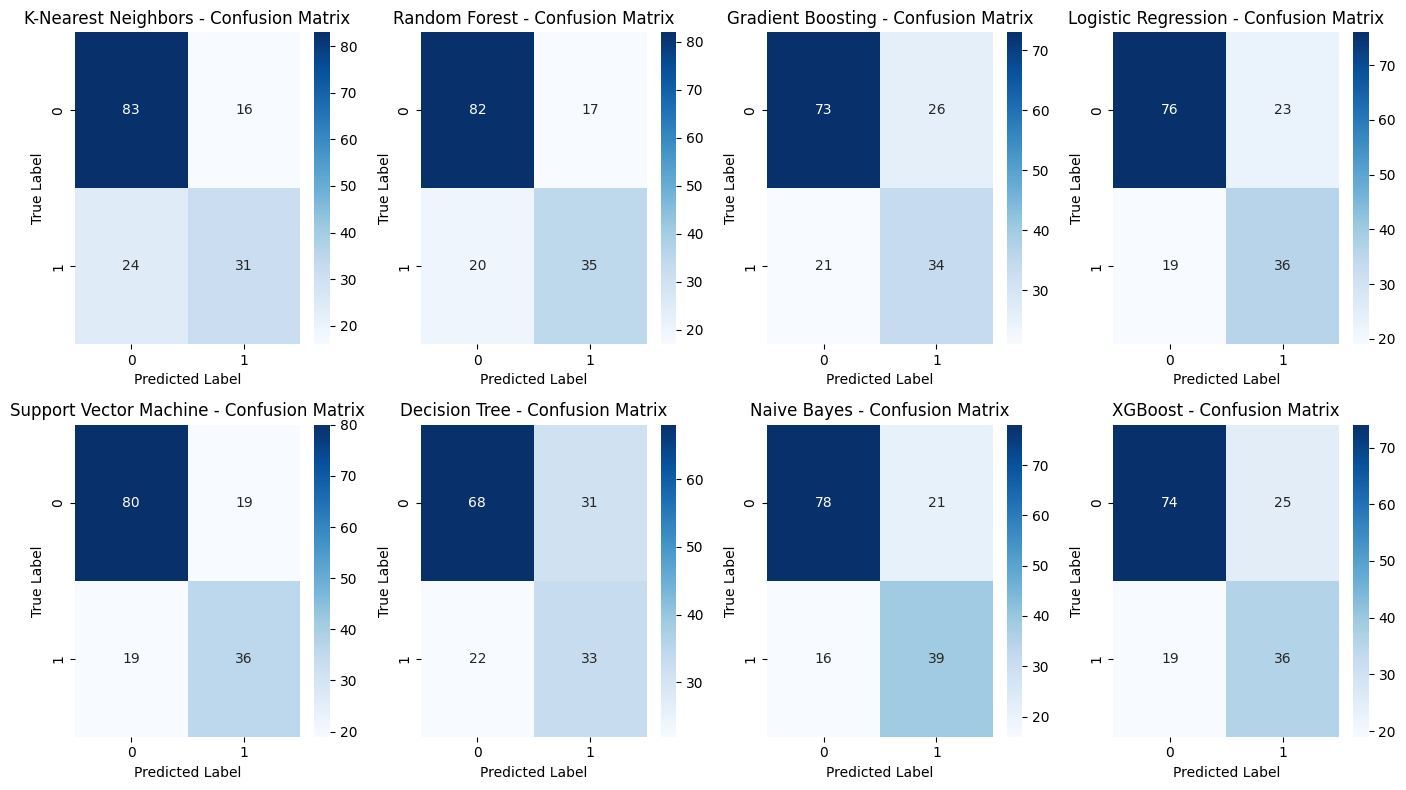

In [143]:
plt.figure(figsize=(14, 8))
for i, model_name in enumerate(test_results_df["Model"]):
    plt.subplot(2, 4, i + 1)
    sns.heatmap(test_results_df.loc[i, "Confusion Matrix"], annot=True, fmt="d", cmap="Blues",
                xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# **Her bir modelin test setindeki performanslarını görselleştirme**

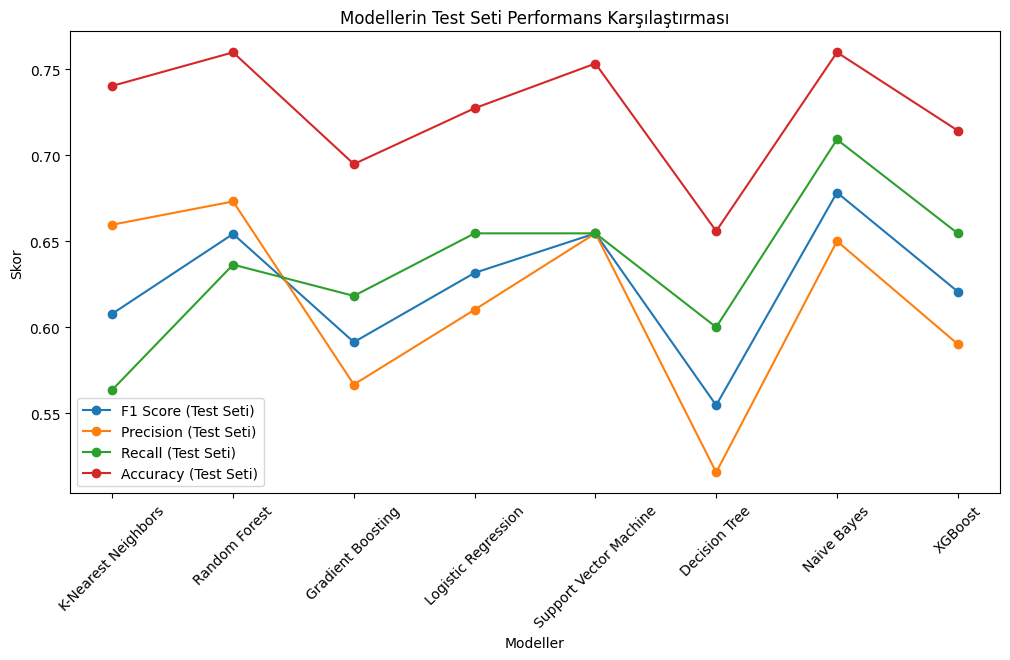

In [144]:
plt.figure(figsize=(12, 6))
for metric in ["F1 Score", "Precision", "Recall", "Accuracy"]:
    plt.plot(test_results_df["Model"], test_results_df[metric], marker='o', label=metric + ' (Test Seti)')

plt.title('Modellerin Test Seti Performans Karşılaştırması')
plt.xlabel('Modeller')
plt.ylabel('Skor')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# **Modellerin en iyi olduğu metrikleri yazdırma**

In [145]:
from tabulate import tabulate

table = tabulate(test_results_df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)

╒════════════════════════╤════════════╤═════════════╤══════════╤════════════╤════════════════════╕
│ Model                  │   F1 Score │   Precision │   Recall │   Accuracy │ Confusion Matrix   │
╞════════════════════════╪════════════╪═════════════╪══════════╪════════════╪════════════════════╡
│ K-Nearest Neighbors    │   0.607843 │    0.659574 │ 0.563636 │   0.74026  │ [[83 16]           │
│                        │            │             │          │            │  [24 31]]          │
├────────────────────────┼────────────┼─────────────┼──────────┼────────────┼────────────────────┤
│ Random Forest          │   0.654206 │    0.673077 │ 0.636364 │   0.75974  │ [[82 17]           │
│                        │            │             │          │            │  [20 35]]          │
├────────────────────────┼────────────┼─────────────┼──────────┼────────────┼────────────────────┤
│ Gradient Boosting      │   0.591304 │    0.566667 │ 0.618182 │   0.694805 │ [[73 26]           │
│         

In [146]:
best_f1_model = test_results_df.loc[test_results_df["F1 Score"].idxmax()]["Model"]
best_precision_model = test_results_df.loc[test_results_df["Precision"].idxmax()]["Model"]
best_recall_model = test_results_df.loc[test_results_df["Recall"].idxmax()]["Model"]
best_accuracy_model = test_results_df.loc[test_results_df["Accuracy"].idxmax()]["Model"]

print(f"En iyi F1 Score Modeli: {best_f1_model}")
print(f"En iyi Precision Modeli: {best_precision_model}")
print(f"En iyi Recall Modeli: {best_recall_model}")
print(f"En iyi Accuracy Modeli: {best_accuracy_model}")

En iyi F1 Score Modeli: Naive Bayes
En iyi Precision Modeli: Random Forest
En iyi Recall Modeli: Naive Bayes
En iyi Accuracy Modeli: Random Forest
